# Titan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import interpolate
from scipy.interpolate import interp1d
import seaborn as sns

### Lambert Scaling Function

In [7]:
# To convert to phase angle= 0 use the lambertian phase integral (PSG eqn 77) to simulate full disk view
def get_scale_factor_lambert(phase_angle): # phase angle in degrees
    scale_val= (1/np.pi)*(np.sin(np.deg2rad(phase_angle))+(np.pi-np.deg2rad(phase_angle))*np.cos(np.deg2rad(phase_angle)))
    return scale_val

### Read in all data sources

In [8]:
# kark 1998 full disk albedo
kark= np.genfromtxt('1995_karkoschka.txt')
# neff et al 1984 geo albedo
neff= pd.read_csv('Neff_SORTED_table4.csv', comment="#")
# negrao et al. 2006 geo albedo 1994 data
negrao1= pd.read_csv('negrao_1994_fig1b_part1.csv')
negrao2= pd.read_csv('negrao_fig1b_1994data_cfht_titan_part2.csv')
negrao3= pd.read_csv('negrao_fig1b_1994data_cfht_titan_part3.csv')
# negrao et al. 2006 geo albedo 1995 data
negrao_95_part1= pd.read_csv('negrao_1995_fig1a_part1.csv')
negrao_95_part2= pd.read_csv('negrao_1995_fig1a_part2.csv')
negrao_95_part3= pd.read_csv('negrao_1995_fig1a_part3.csv')
#mcgrath et al 1998 geo albedo
mcgrath= pd.read_csv('mcgrath_98_fig_7.csv')
# lavvas et al 2008 geometric albedo model
lavvas_model= pd.read_csv('lavvas_model_fig19.csv')
# Younkin 1974
younkin= np.genfromtxt('Younkin1974_table3-2.txt')
# Negrao et al. 2006 fig 5 model data Irwin
irwin_model= pd.read_csv('negrao_fig5_irwinmodel.csv')

### Trying out smoothing the data
- did not use this in the final plot

In [9]:
def moving_average_smoothing(data, window_size):
    data = np.array(data)
    n = len(data)
    half_window = int(np.ceil(window_size * n / 2))
    smoothed_data = []
    for i in range(n):
        # Define the window range
        start = max(0, i - half_window)
        end = min(n, i + half_window + 1)
        
        # Compute the median of the window
        window = data[start:end]
        median_value = np.mean(window)
        # Append the median value to the smoothed data
        smoothed_data.append(median_value)
    return np.array(smoothed_data)

In [10]:
neff_smooth= moving_average_smoothing(neff['p_titan']/1000, 0.006) # this is equal to about 3 nm

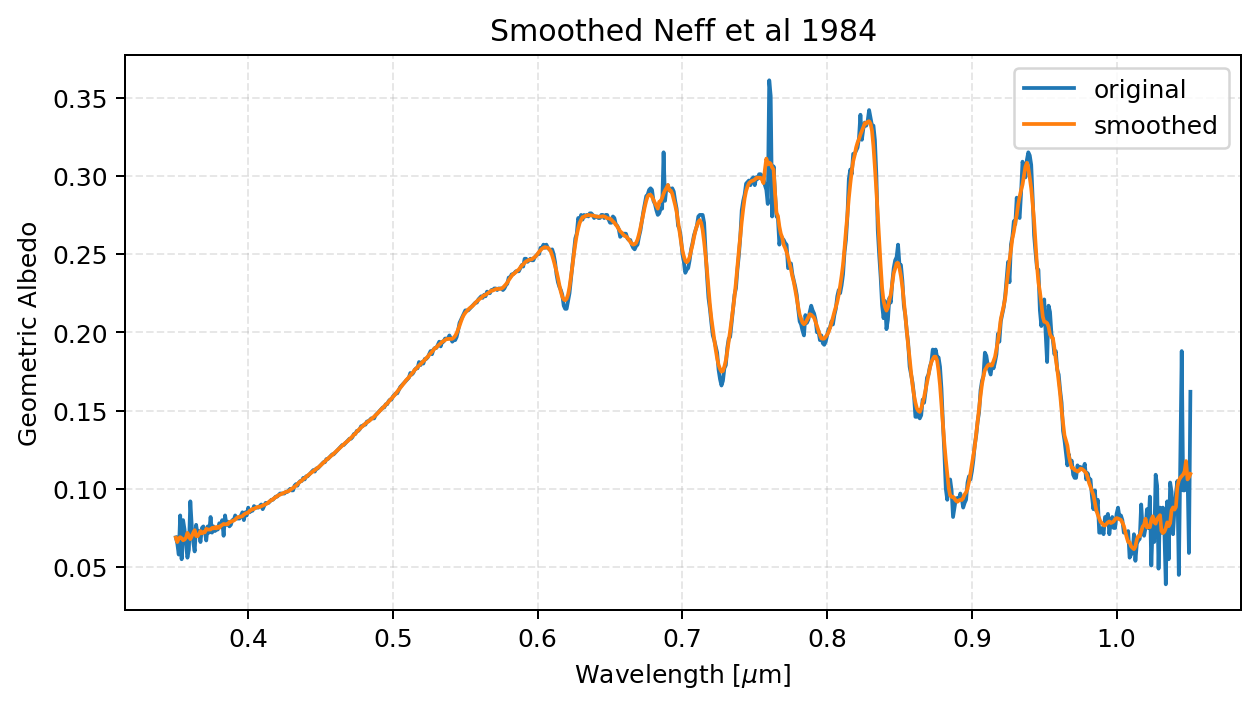

In [46]:
plt.figure(figsize=(8,4), dpi=180)
plt.plot(neff['wavelength (A˚)']/10000, neff['p_titan']/1000, label='original')
plt.plot(neff['wavelength (A˚)']/10000, neff_smooth, label='smoothed')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.ylabel('Geometric Albedo')
plt.xlabel('Wavelength [$\mu$m]')
plt.title('Smoothed Neff et al 1984');

In [11]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [12]:
cb_palette= sns.color_palette("colorblind")

# Tri Plot

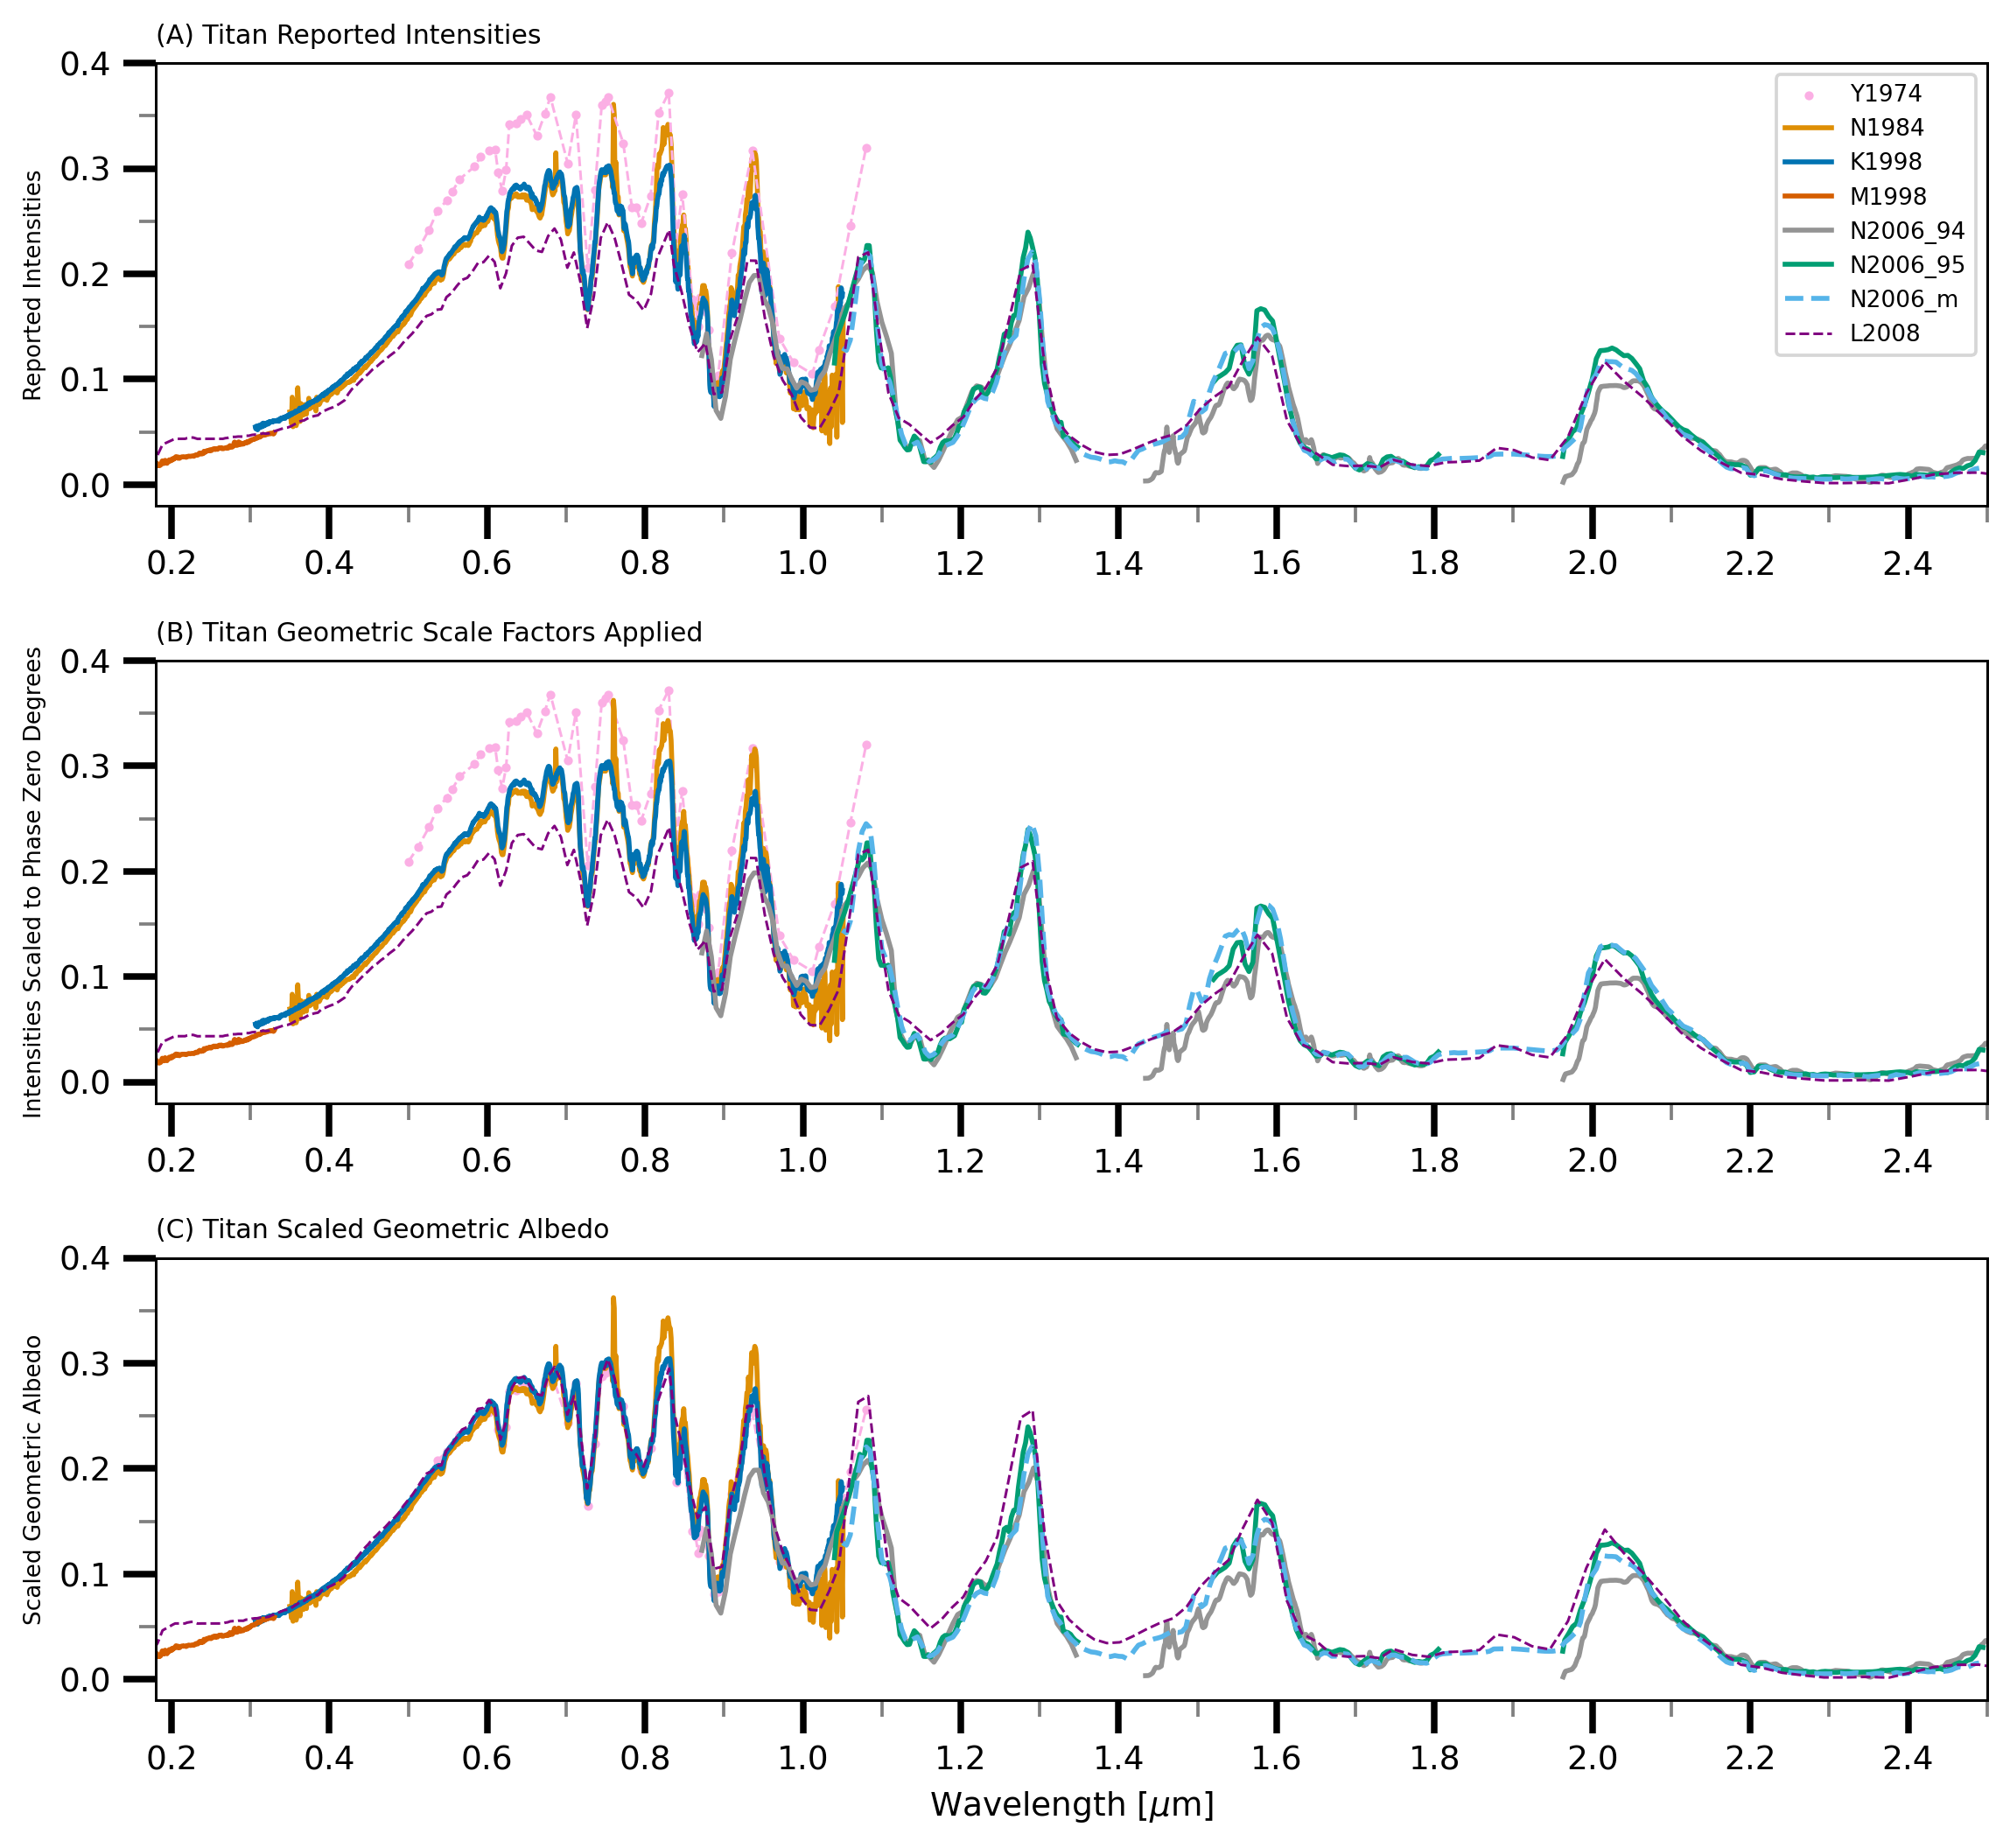

In [37]:
# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 9), dpi=270)
plt.subplots_adjust(hspace=0.35)

# DATA 
# FIGURE 1- ORIGINAL DATA
axes[0].scatter(younkin[:,0], younkin[:,1], label='Y1974', color=cb_palette[6], s=3)
axes[0].plot(neff['wavelength (A˚)']/10000, neff['p_titan']/1000, label='N1984', color=cb_palette[1])
axes[0].plot(younkin[:,0], younkin[:,1], color=cb_palette[6], linestyle='--', linewidth=0.8)
axes[0].plot(kark[kark[:,0]/1000>0.306][:,0]/1000,kark[kark[:,0]/1000>0.306][:,7], label='K1998', color=cb_palette[0])
axes[0].plot(mcgrath['x'], mcgrath['y'], label='M1998', color=cb_palette[3])
# Negrao 2006 data from 1994
axes[0].plot(negrao1['x'], negrao1['y'], label='N2006_94', color=cb_palette[7])
axes[0].plot(negrao2['x'], negrao2['y'], color=cb_palette[7])
axes[0].plot(negrao3['x'], negrao3['y'], color=cb_palette[7])
# Negrao 2006 data from 1995
axes[0].plot(negrao_95_part1['x'], negrao_95_part1['y'], color=cb_palette[2])
axes[0].plot(negrao_95_part2['x'], negrao_95_part2['y'], color=cb_palette[2], label='N2006_95')
axes[0].plot(negrao_95_part3['x'], negrao_95_part3['y'], color=cb_palette[2])

axes[0].plot(irwin_model['x'],irwin_model['y']*0.9, label='N2006_m', linestyle='--', color=cb_palette[9])
axes[0].plot(lavvas_model['x'], lavvas_model['y'], label='L2008', color='purple', linestyle='dashed', linewidth=0.8)

# # FIGURE 2- GEOMETRIC SCALING FACTORS APPLIED
axes[1].scatter(younkin[:,0], younkin[:,1], label='Y1974', color=cb_palette[6], s=3)
axes[1].plot(younkin[:,0], younkin[:,1], color=cb_palette[6], linestyle='--', linewidth=0.8)
axes[1].plot(neff['wavelength (A˚)']/10000, (neff['p_titan']/1000)/get_scale_factor_lambert(4.9), label='N1984', color=cb_palette[1])
axes[1].plot(kark[kark[:,0]/1000>0.306][:,0]/1000,kark[kark[:,0]/1000>0.306][:,7]/get_scale_factor_lambert(5.7), label='K1998', color=cb_palette[0])
axes[1].plot(mcgrath['x'], mcgrath['y'], label='M1998', color=cb_palette[3])
# Negrao 2006 data from 1994
axes[1].plot(negrao1['x'], negrao1['y'], label='N2006', color=cb_palette[7])
axes[1].plot(negrao2['x'], negrao2['y'], label='N2006', color=cb_palette[7])
axes[1].plot(negrao3['x'], negrao3['y'], label='N2006', color=cb_palette[7])
# Negrao 2006 data from 1995
axes[1].plot(negrao_95_part1['x'], negrao_95_part1['y'], color=cb_palette[2])
axes[1].plot(negrao_95_part2['x'], negrao_95_part2['y'], color=cb_palette[2], label='N2006_95')
axes[1].plot(negrao_95_part3['x'], negrao_95_part3['y'], color=cb_palette[2])

axes[1].plot(irwin_model['x'],irwin_model['y'], label='N2006_m', linestyle='--', color=cb_palette[9])
axes[1].plot(lavvas_model['x'], lavvas_model['y'], label='L2008', color='purple', linestyle='dashed', linewidth=0.8)

# # FIGURE 3- EMPIRICAL SCALING FACTORS
axes[2].scatter(younkin[:,0], younkin[:,1]*0.8, label='Y1974', color=cb_palette[6], s=3)
axes[2].plot(younkin[:,0], younkin[:,1]*0.8, color=cb_palette[6], linestyle='--', linewidth=0.8)
axes[2].plot(neff['wavelength (A˚)']/10000, (neff['p_titan']/1000)/get_scale_factor_lambert(4.9), label='N1984', color=cb_palette[1])
axes[2].plot(kark[kark[:,0]/1000>0.306][:,0]/1000,kark[kark[:,0]/1000>0.306][:,7]/get_scale_factor_lambert(5.7), label='K1998', color=cb_palette[0])
axes[2].plot(mcgrath['x'], mcgrath['y']*1.2, label='M1998', color=cb_palette[3])
# Negrao 2006 data from 1994
axes[2].plot(negrao1['x'], negrao1['y'], label='N2006_94', color=cb_palette[7])
axes[2].plot(negrao2['x'], negrao2['y'], color=cb_palette[7])
axes[2].plot(negrao3['x'], negrao3['y'], color=cb_palette[7])
# Negrao 2006 data from 1995
axes[2].plot(negrao_95_part1['x'], negrao_95_part1['y'], color=cb_palette[2])
axes[2].plot(negrao_95_part2['x'], negrao_95_part2['y'], color=cb_palette[2], label='N2006_95')
axes[2].plot(negrao_95_part3['x'], negrao_95_part3['y'], color=cb_palette[2])

axes[2].plot(irwin_model['x'],irwin_model['y']*0.9, label='N2006_m', linestyle='--', color=cb_palette[9])
axes[2].plot(lavvas_model['x'], lavvas_model['y']*1.22, label='L2008', color='purple', linestyle='dashed', linewidth=0.8)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FORMAT~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for value in range(3):
    # Keeping the tick marks consistent across the plots
    axes[value].xaxis.set_major_locator(MultipleLocator(0.2))
    axes[value].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[value].yaxis.set_major_locator(MultipleLocator(0.1))
    axes[value].yaxis.set_minor_locator(MultipleLocator(0.05))
    # Customize the appearance of ticks
    axes[value].tick_params(axis='both', which='major', length=10, width=2, color='black')
    axes[value].tick_params(axis='both', which='minor', length=5, width=1, color='gray')
    #axes[value].set_xlim(0.2,max(meadows['x']))
    axes[value].set_ylim(-0.02,0.4)
    axes[value].set_xlim(min(mcgrath['x']),2.5)
    
axes[0].set_title('(A) Titan Reported Intensities', fontsize=8, loc='left')
axes[1].set_title('(B) Titan Geometric Scale Factors Applied', fontsize=8, loc='left')
axes[2].set_title('(C) Titan Scaled Geometric Albedo', fontsize=8, loc='left')
axes[0].set_ylabel('Reported Intensities', fontsize=7)
axes[1].set_ylabel('Intensities Scaled to Phase Zero Degrees', fontsize=7)
axes[2].set_ylabel('Scaled Geometric Albedo', fontsize=7)
axes[2].set_xlabel('Wavelength [$\mu$m]')
axes[0].legend(fontsize=7, loc='upper right') #, fancybox=True, shadow=True); #bbox_to_anchor=(0.7, 0.7),
plt.savefig('final_plots/titan_triplot.png', bbox_inches='tight');

## Composite Spectrum

#### Using the Negrao/ Irwin model to fill in gaps from negrao CFHT Data in final plot

In [24]:
x_1= list(mcgrath['x'])
y_1= list(mcgrath['y']*1.2)
x_2= kark[(kark[:,0]/1000>0.33) & (kark[:,0]/1000<1.04)][:,0]/1000
y_2= kark[(kark[:,0]/1000>0.33) & (kark[:,0]/1000<1.04)][:,7]/get_scale_factor_lambert(5.7)
x_3= negrao_95_part1[negrao_95_part1['x']>1.05]['x']
y_3= negrao_95_part1[negrao_95_part1['x']>1.05]['y']
x_4= irwin_model[(irwin_model['x']>negrao_95_part1['x'].max()) & (irwin_model['x']<negrao_95_part2['x'].min())]['x']
y_4= irwin_model[(irwin_model['x']>negrao_95_part1['x'].max()) & (irwin_model['x']<negrao_95_part2['x'].min())]['y']
x_5= negrao_95_part2['x']
y_5= negrao_95_part2['y']
x_6= irwin_model[(irwin_model['x']>negrao_95_part2['x'].max()) & (irwin_model['x']<1.965)]['x']
y_6= irwin_model[(irwin_model['x']>negrao_95_part2['x'].max()) & (irwin_model['x']<1.965)]['y']
x_7= negrao_95_part3[negrao_95_part3['x']>1.963]['x']
y_7= negrao_95_part3[negrao_95_part3['x']>1.963]['y']
x_new_list= np.concatenate((x_1, x_2, x_3,x_4, x_5, x_6, x_7))
y_new_list= np.concatenate((y_1, y_2, y_3,y_4, y_5, y_6, y_7))
composite_df= pd.DataFrame({'x_1': x_new_list, 'y_1': y_new_list})

In [29]:
x_values= (1.0396, 1.0527)
y_values= (0.1401, 0.16099)
dashed_line= np.column_stack((x_values, y_values))

In [30]:
x_dashed=composite_df[(composite_df['x_1'] > 1.491) & (composite_df['x_1'] < 1.496)]['x_1']
y_dashed=composite_df[(composite_df['x_1'] > 1.491) & (composite_df['x_1'] < 1.496)]['y_1']

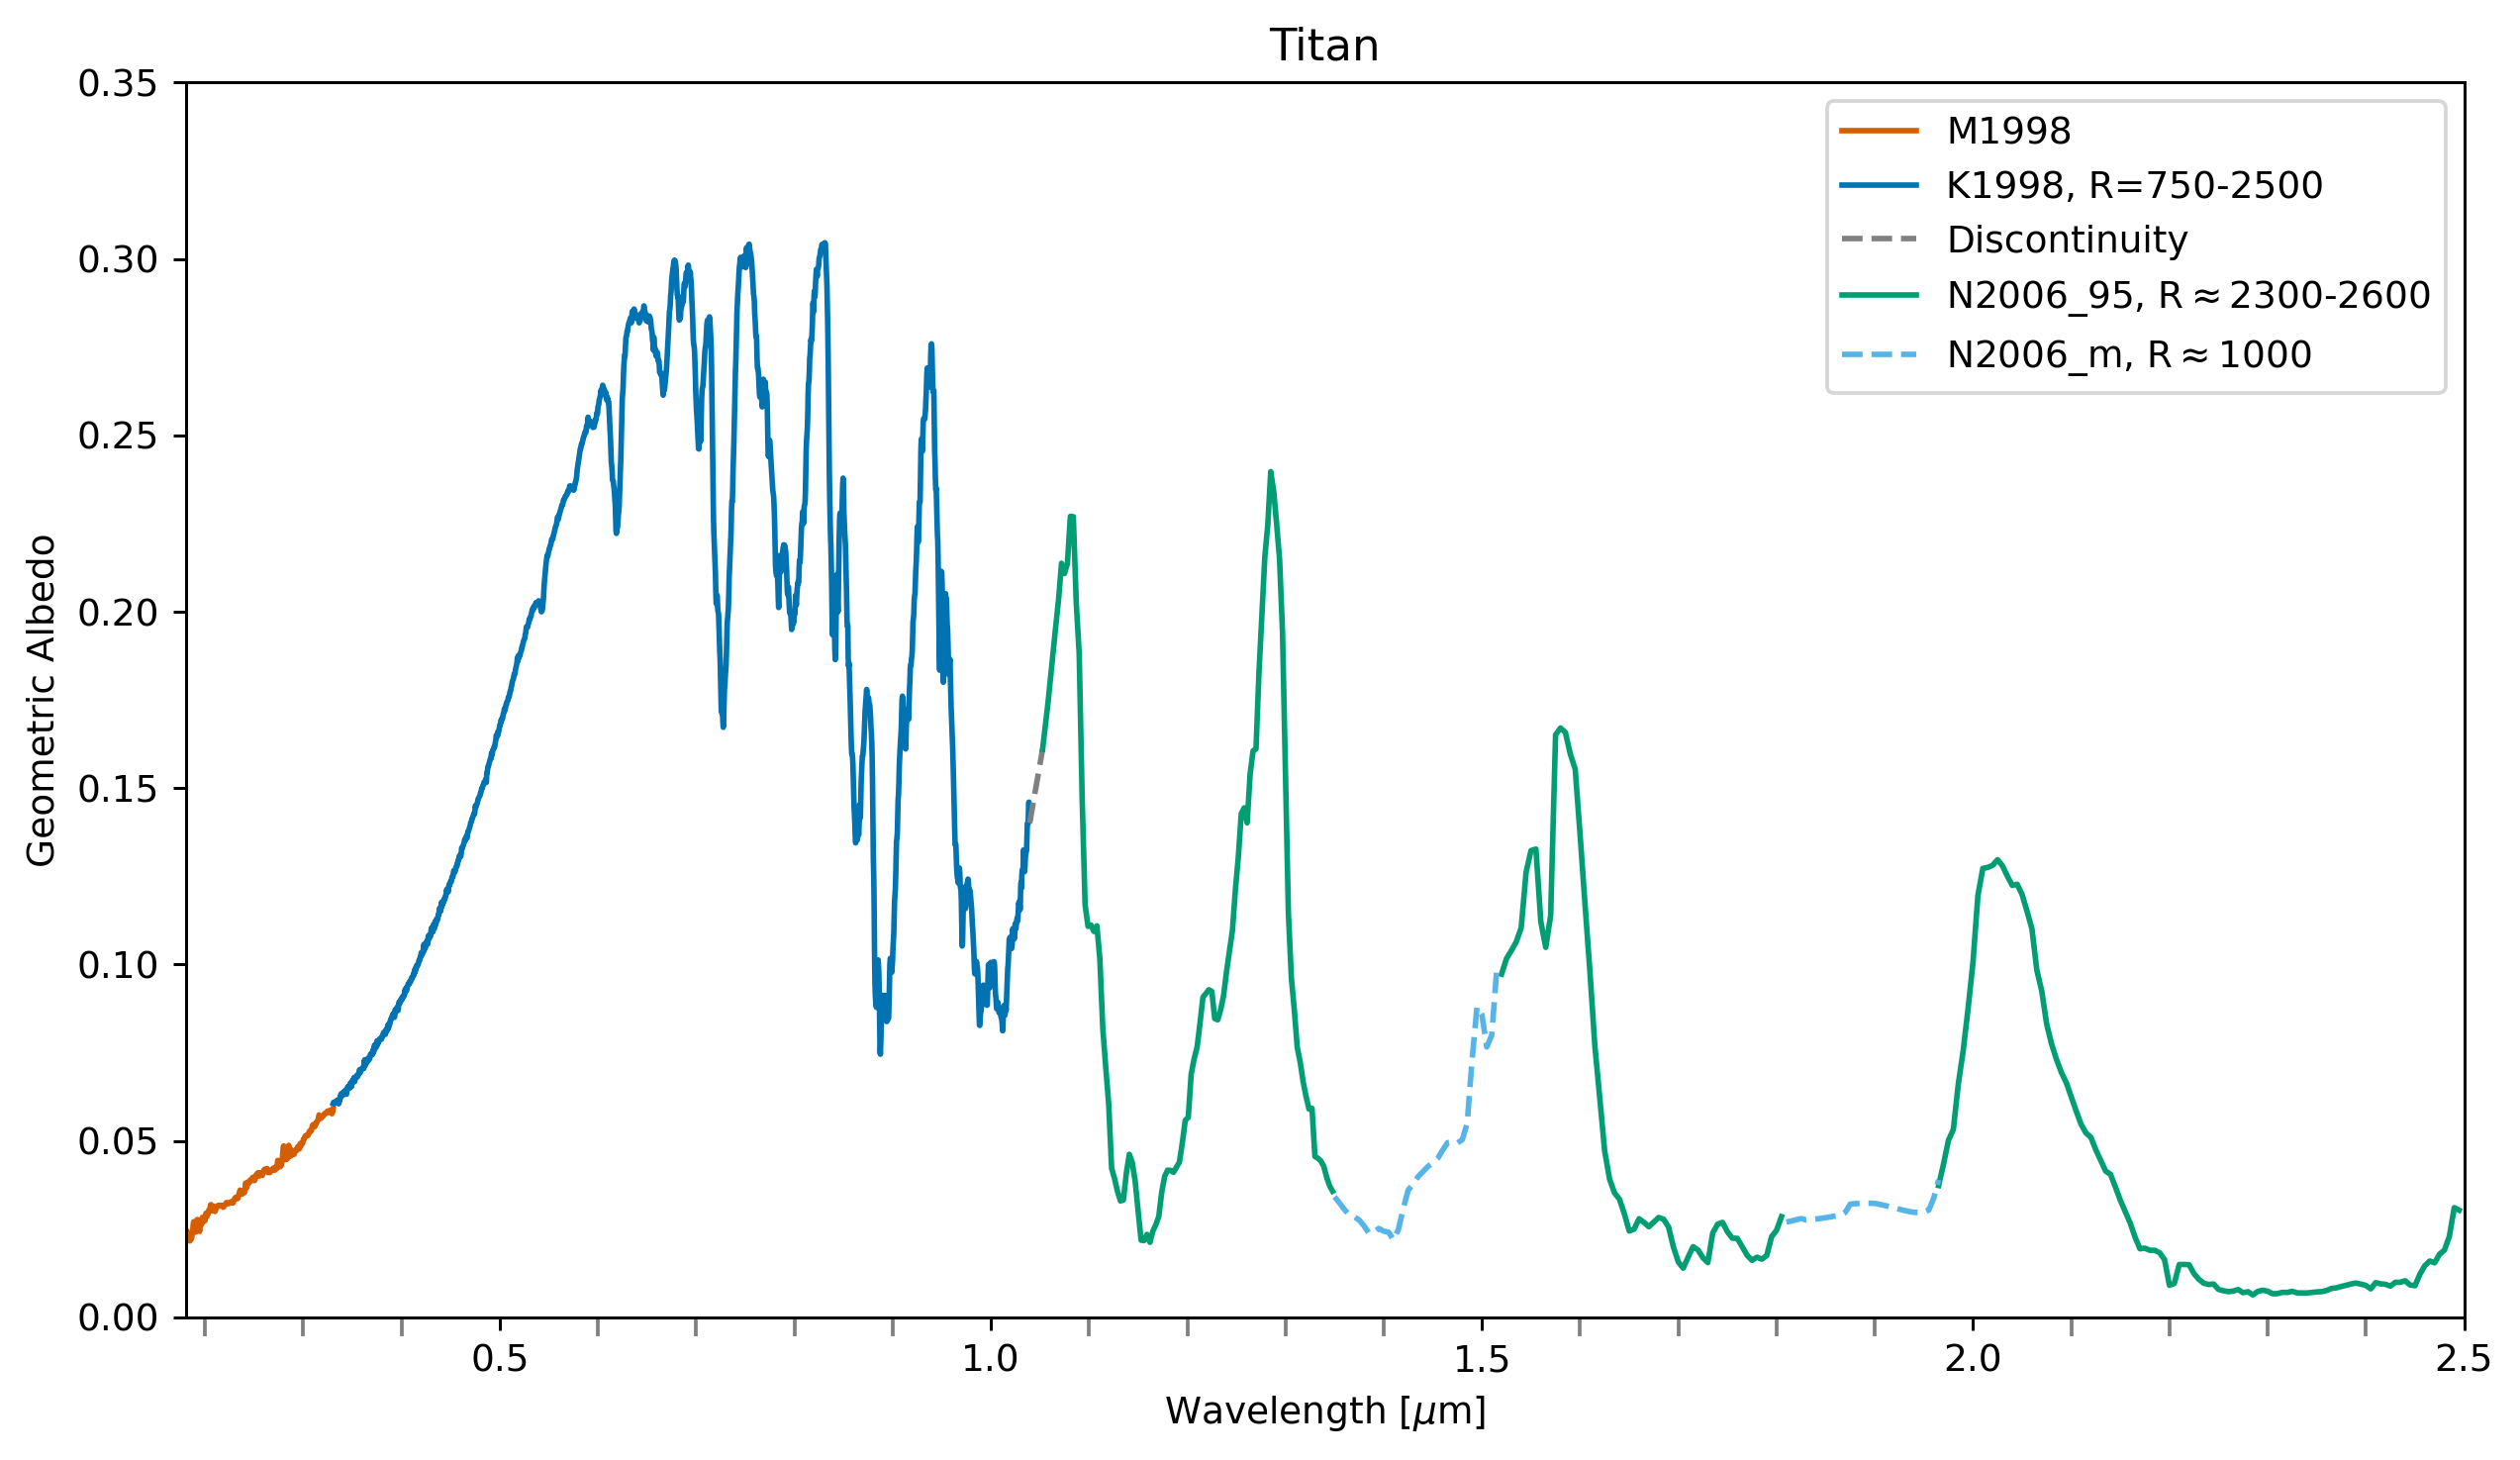

In [36]:
plt.figure(figsize=(11,6), dpi=270)

plt.plot(mcgrath['x'], mcgrath['y']*1.2, color=cb_palette[3], label='M1998')
plt.plot(kark[(kark[:,0]/1000>0.33) & (kark[:,0]/1000<1.04)][:,0]/1000,kark[(kark[:,0]/1000>0.33) & (kark[:,0]/1000<1.04)][:,7]/get_scale_factor_lambert(5.7), color=cb_palette[0], label='K1998, R=750-2500')

plt.plot(dashed_line[:,0], dashed_line[:,1], color='gray', linestyle='dashed', label='Discontinuity')

plt.plot(negrao_95_part1[negrao_95_part1['x']>1.05]['x'], negrao_95_part1[negrao_95_part1['x']>1.05]['y'], color=cb_palette[2], label=r'N2006_95, R$\approx$2300-2600') 
plt.plot(negrao_95_part2['x'], negrao_95_part2['y'], color=cb_palette[2])
plt.plot(negrao_95_part3[negrao_95_part3['x']>1.963]['x'], negrao_95_part3[negrao_95_part3['x']>1.963]['y'], color=cb_palette[2])

plt.plot(irwin_model[(irwin_model['x']>negrao_95_part1['x'].max()) & (irwin_model['x']<negrao_95_part2['x'].min())]['x'],irwin_model[(irwin_model['x']>negrao_95_part1['x'].max()) & (irwin_model['x']<negrao_95_part2['x'].min())]['y'], label=r'N2006_m, R$\approx$1000', color=cb_palette[9], linestyle='dashed')
#plt.plot(irwin_model[(irwin_model['x']>1.33) & (irwin_model['x']<1.964)]['x'],irwin_model[(irwin_model['x']>1.33) & (irwin_model['x']<1.963)]['y'], label='Irwin Model', color='red', linestyle='dashed')
plt.plot(irwin_model[(irwin_model['x']>negrao_95_part2['x'].max()) & (irwin_model['x']<1.965)]['x'],irwin_model[(irwin_model['x']>negrao_95_part2['x'].max()) & (irwin_model['x']<1.965)]['y'], color=cb_palette[9], linestyle='dashed')

plt.legend()
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.1))
plt.gca().tick_params(axis='both', which='minor', length=5, width=1, color='gray')
plt.ylim(0,0.35)
plt.xlim(mcgrath['x'].min(),2.5)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Geometric Albedo')
plt.title('Titan');
plt.savefig('final_plots/titan_composite.png', bbox_inches="tight") ;

# Save Data

In [35]:
composite_df.to_csv('composite_spectrum/titan_composite_data.csv', index=False)
composite_df.to_csv('composite_spectrum/titan_composite_data.txt', sep=' ', index=False)

## Titan Resolution Info from each Source

### N2006 Data
- The data is collected in 3 bands: J (1.04-1.35), H (1.5-1.79), K (1.96-2.56)
- J: 0.52 nm at 1 micron, H: 0.66nm at 1micron and K: 0.87nm at 1micron
    - values seem odd because there were converted from wavenumber to spectral res. at 1 micron
- Resolving Power equation: $\frac{\lambda} {\Delta\lambda}$

In [14]:
rp_1_low= round(1.04 / (5.2 * 10**(-4)),3)
rp_1_high= 1.35/(5.2*10**(-4))
rp_2_low= 1.50 / (6.6 * 10**(-4))
rp_2_high= 1.79/(6.6*10**(-4))
rp_3_low=1.96 / (8.7 * 10**(-4))
rp_3_high= 2.56/(8.7*10**(-4))

In [35]:
print("The resolving power at 1.04 microns:", round(1.04 / (5.2 * 10**(-4)), 3), ". The resolving power at 1.35 microns:", round(1.35/(5.2*10**(-4)),3),". J band average RP:", round(np.mean([rp_1_low,rp_1_high]),3))
print("The resolving power at 1.50 microns:", round(1.50 / (6.6 * 10**(-4)), 3), ". The resolving power at 1.79 microns:", round(1.79/(6.6*10**(-4)),3),". H band average RP:", round(np.mean([rp_2_low,rp_2_high]),3))
# This is the Resolving Power calculated at 1.96 & 2.56 microns with a spectral resolution of 0.87 nm at 1 micron
print("The resolving power at 1.96 microns:", round(1.96 / (8.7 * 10**(-4)), 3), ". The resolving power at 2.56 microns:", round(2.56/(8.7*10**(-4)),3),". K band average RP:", round(np.mean([rp_3_low,rp_3_high]),3))

The resolving power at 1.04 microns: 2000.0 . The resolving power at 1.35 microns: 2596.154 . J band average RP: 2298.077
The resolving power at 1.50 microns: 2272.727 . The resolving power at 1.79 microns: 2712.121 . H band average RP: 2492.424
The resolving power at 1.96 microns: 2252.874 . The resolving power at 2.56 microns: 2942.529 . K band average RP: 2597.701
